ECE: 0.08999999999999996


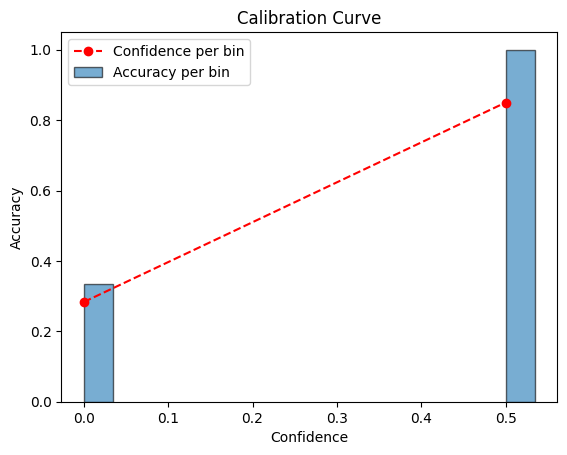

In [2]:

import numpy as np
import matplotlib.pyplot as plt

def calculate_ece(labels, predictions, n_bins=2):
    bins = np.linspace(0, 1, n_bins + 1)
    bin_lowers = bins[:-1]
    bin_uppers = bins[1:]

    ece = 0.0
    bin_accuracies = []
    bin_confidences = []
    bin_counts = []

    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        # Find indices of predictions that fall into the current bin
        in_bin = np.where((predictions > bin_lower) & (predictions <= bin_upper))[0]
        if len(in_bin) > 0:
            # True labels and predicted probabilities in the bin
            bin_labels = labels[in_bin]
            bin_predictions = predictions[in_bin]
            
            # Accuracy and confidence in the bin
            accuracy = np.mean(bin_labels)
            confidence = np.mean(bin_predictions)
            
            # ECE contribution from this bin, weighted by the number of samples in the bin
            ece += np.abs(accuracy - confidence) * len(in_bin) / len(predictions)

            # Save results for plotting
            bin_accuracies.append(accuracy)
            bin_confidences.append(confidence)
            bin_counts.append(len(in_bin))

    print("ECE:", ece)

    # Plotting
    plt.bar(bin_lowers, bin_accuracies, width=1/29, align='edge', edgecolor='black', alpha=0.6, label='Accuracy per bin')
    plt.plot(bin_lowers, bin_confidences, marker='o', color='red', linestyle='--', label='Confidence per bin')
    plt.xlabel('Confidence')
    plt.ylabel('Accuracy')
    plt.title('Calibration Curve')
    plt.legend()
    plt.show()

# Example labels and predictions

